In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [3]:
# import the algorithm
from fastlmm.association import single_snp
from pysnptools.snpreader import Pheno

# set up data
##############################
bed_fn = "./data/plink_files/atchely_imputed.bed"
pheno = "./data/fastlmm/fastlmm_pheno.txt"
cov_fn = "./data/fastlmm/fastlmm_cov.txt"

# run gwas
###################################################################
results_df = single_snp( bed_fn, pheno=pheno, covar = cov_fn, count_A1=True)

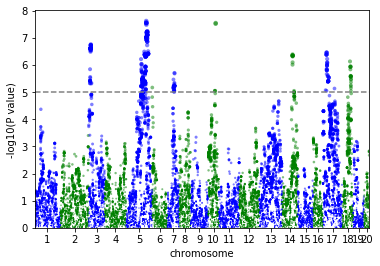

lambda=2.3419


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2005,AX-168402685,5,0,122117180,2.405834e-08,-0.553452,0.098790,0.123965,0.0,0.242880
1,2016,AX-168416834,5,0,122961646,2.799509e-08,-0.550937,0.098812,0.123383,0.0,0.242880
2,2021,AX-168399814,5,0,123013233,2.799509e-08,-0.550937,0.098812,0.123383,0.0,0.242880
3,2014,AX-168388504,5,0,122957815,2.799509e-08,-0.550937,0.098812,0.123383,0.0,0.242880
4,2018,AX-168413648,5,0,122970851,2.799509e-08,-0.550937,0.098812,0.123383,0.0,0.242880
5,749,AX-168403658,10,0,98142348,2.858983e-08,0.553742,0.099382,0.123302,0.0,0.239593
6,2004,AX-168406580,5,0,122065286,2.977739e-08,-0.549770,0.098797,0.123145,0.0,0.242880
7,746,AX-168381012,10,0,97173547,3.041174e-08,0.552611,0.099374,0.123063,0.0,0.239593
8,2020,AX-168378634,5,0,122991984,3.280618e-08,-0.547817,0.098750,0.122770,0.0,0.242880
9,2121,AX-168384244,5,0,126512863,5.704489e-08,-0.545970,0.100206,0.120610,0.0,0.242880


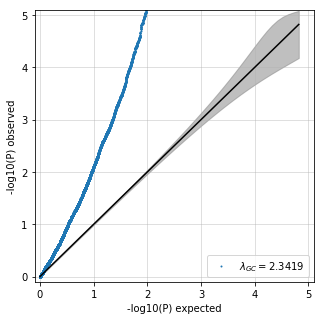

In [5]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 2000)
results_df.head(n=10)

In [24]:
# example for two kernel feature selection
# this takes a couple of minutes to run on a 20-proc machine.
from pysnptools.snpreader import Bed
from fastlmm.association import single_snp_all_plus_select

from fastlmm.util.runner import LocalMultiProc
runner = LocalMultiProc(20,mkl_num_threads=5)
    
# define file names
snp_reader = Bed("./data/plink_files/atchley", count_A1=True)
pheno_fn = "./data/fastlmm_pheno.txt"
cov_fn = "./data/fastlmm_cov.txt"

# find the chr5 SNPs
test_snps = snp_reader[:,snp_reader.pos[:,0] == 5]

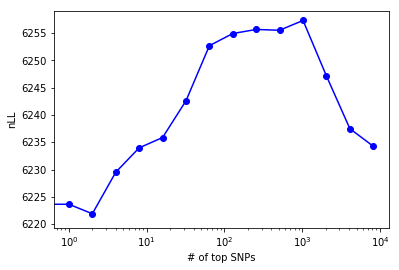

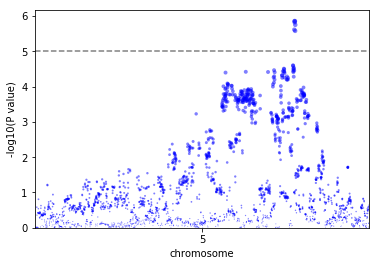

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2196,AX-168416834,5.0,62.415,122961646.0,0.000001,-0.645355,0.133335,0.107282,0.0,0.155188
1,2199,AX-168413648,5.0,62.420,122970851.0,0.000001,-0.646255,0.133539,0.107268,0.0,0.155188
2,2197,AX-168426259,5.0,62.415,122961646.0,0.000002,-0.644945,0.133693,0.106931,0.0,0.155188
3,2202,AX-168399814,5.0,62.446,123013233.0,0.000002,-0.640453,0.133688,0.106199,0.0,0.155188
4,2194,AX-168388504,5.0,62.412,122957815.0,0.000002,-0.631337,0.133580,0.104788,0.0,0.155188


In [26]:
#select the 2nd kernel and run GWAS
results_df = single_snp_all_plus_select(test_snps=test_snps,G=snp_reader,
                                        pheno=pheno_fn,GB_goal=2,do_plot=True,runner=runner)

import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

results_df.head()